In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [630]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.cross_validation import train_test_split , StratifiedKFold

# Read in test and train sets

In [663]:
train_df = pd.read_csv('../alexromero/Bootcamp/ML Project/train.csv')
test_df = pd.read_csv('../alexromero/Bootcamp/ML Project/test.csv')

# Create a pipeline for multiple models
* This needs mucho work

In [673]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## Use pd.DataFrame.select_dtypes() to specify column types and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## Use pd.Series.drop() to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [664]:
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mean sale price: ~180,000

Most values between 130,000-215,000

Skew is: 1.88287575977


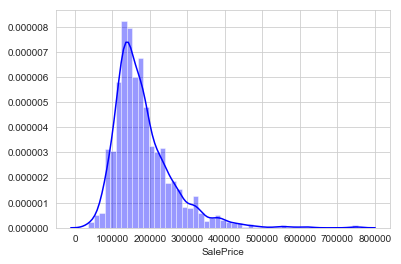

In [606]:
print ("Skew is:", train_df.SalePrice.skew())
sns.distplot(train_df.SalePrice, color='blue')
plt.show()

Sale price is skewed right.

Skew is: 0.121335062205


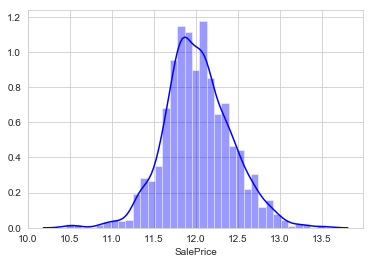

In [665]:
new_log = np.log(train_df.SalePrice)
print ("Skew is:", new_log.skew())
sns.distplot(new_log, color='blue')
plt.show()

In [666]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
#train_df.drop("Id", axis = 1, inplace = True)
#test_df.drop("Id", axis = 1, inplace = True)

Y_train = train_df['SalePrice']
x_train = train_df.drop('SalePrice', axis=1)

train_size = len(x_train.values)
test_size = len(Y_train.values)

In [667]:
print('Size of training set: ' + str(train_size), '\nSize of test set: ' + str(test_size))

Size of training set: 1460 
Size of test set: 1460


In [668]:
x_test = test_df.copy()

In [669]:
print(x_train.shape)
print(x_test.shape)

(1460, 80)
(1459, 80)


### Finally, concatenate train and test set ... check final size

In [613]:
all_data = pd.concat([x_train, x_test], ignore_index=True)
all_data.shape

(2919, 79)

In [614]:
all_data.to_csv('all_data.csv')

## A look at numeric features

In [615]:
numeric = train_df.select_dtypes(include=[np.number])
numeric.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

What are the strongest correlations?

In [616]:
corrs = train_df.corr()['SalePrice']
corrs = pd.DataFrame(corrs)
corrs.columns = ["Correlation"]
corrs2 = corrs.sort_values(by=['Correlation'], ascending=False)
corrs2.head(6)

,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581


Which are the most negatively correlated?

In [617]:
corrs2.tail(5)

,Correlation
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


### Invstigating OverallQual

In [618]:
train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

Values range from [1-10]

Text(0.5,1,'Sale Price vs. Overall Quality')

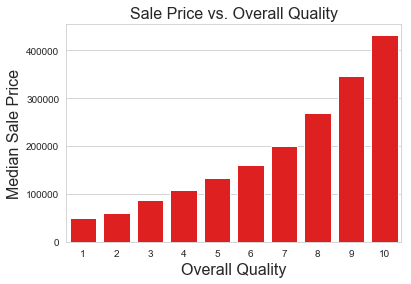

In [619]:
quality = train_df.groupby('OverallQual')['SalePrice'].agg('median').reset_index()
sns.barplot(quality['OverallQual'], quality['SalePrice'], color = 'r')
plt.xlabel('Overall Quality', size=16)
plt.ylabel('Median Sale Price', size=16)
plt.title('Sale Price vs. Overall Quality', size=16)

Which numeric features have missing values?

In [621]:
numeric.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
SalePrice          0
BsmtUnfSF          0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtHalfBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
BsmtFullBath       0
FullBath           0
YrSold             0
OpenPorchSF        0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
WoodDeckSF         0
HalfBath           0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
MSSubClass         0
dtype: int64

### Second highest correlation: GrLivingArea

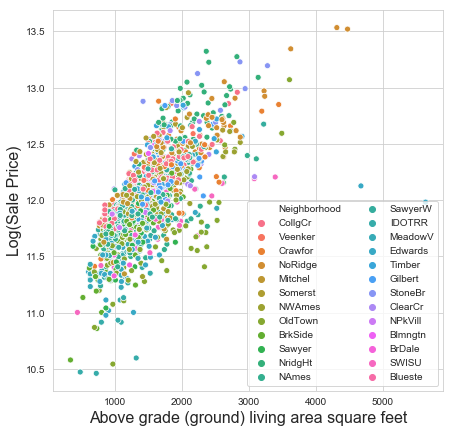

In [622]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=train_df['GrLivArea'], y=new_log, hue=train_df['Neighborhood'])
plt.ylabel('Log(Sale Price)', size=16)
plt.xlabel('Above grade (ground) living area square feet',size=16)
plt.legend(ncol=2, loc=4)
plt.show()

As Living Area Increases, Sale Price Increases

### Second highest correlation: GrLivingArea

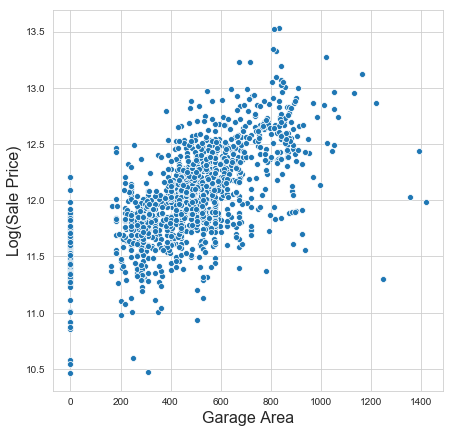

In [533]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=train_df['GarageArea'], y=new_log)
plt.ylabel('Log(Sale Price)', size=16)
plt.xlabel('Garage Area', size=16)
xmin, xmax = plt.xlim()
plt.show()

Many values with 0 which, according to description.txt, indicate there is no garage...change this to "None".  There are also many outliers

In [534]:
2.5 * np.median(train_df['GarageArea'])

1200.0

Create a new dataframe with Garage Area > 1200 and make a scatter plot and compare to previous plot

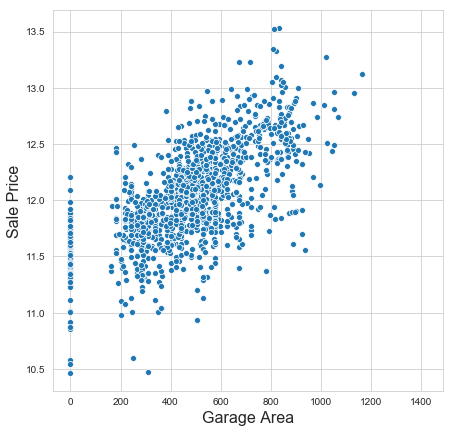

In [535]:
train_df = train_df[train_df['GarageArea'] < 1200]

f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=train_df['GarageArea'], y=new_log)
plt.xlim(xmin, xmax) # This forces the same scale as before
plt.ylabel('Sale Price', size=16)
plt.xlabel('Garage Area', size=16)
plt.show()

# A look at Missing Values

Separate out categorical from all other variable types to inspect from data set the variable descriptors.  Doing this will help us decide better which missing values should get 'unavailable'.

In [538]:
print(all_data.select_dtypes(include=[object]).columns)
print(all_data.select_dtypes(exclude=[object]).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Kitch

Make a new dataframe containing only the counts of features with null values

In [549]:
nas = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))
nas.columns = ['Count of Missing Values']
nas.index.name = 'Feature'
nas.head(20)

,Count of Missing Values
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageCond,81
GarageFinish,81


Most NAs are from PoolQC...PoolQC can be imputed with 'None' if pool area is 0 (no pool)

### Investigating MiscFeature

In [550]:
print ("Misc Feature values: ", train_df.MiscFeature.unique())

Misc Feature values:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


Not sure how this could be helpful yet

## A look at categorical values

In [551]:
categorical = train_df.select_dtypes(exclude=[np.number])
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


# Feature Engineering

Street only has two unique values, Pave and Gravel (only 5)...use one-hot encoding here (AND SAME TO TEST)

In [552]:
train_df.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

In [554]:
train_df['encoded_street'] = pd.get_dummies(train_df.Street, drop_first=True)
test_df['encoded_street'] = pd.get_dummies(train_df.Street, drop_first=True)

In [556]:
print ('Encoded: \n') 
print (train_df.encoded_street.value_counts())

Encoded: 

1    1450
0       5
Name: encoded_street, dtype: int64


Street is now a series of boolean values

SaleCondition

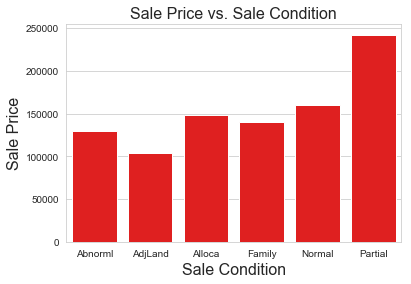

In [578]:
sale_condition = train_df.groupby('SaleCondition')['SalePrice'].agg('median').reset_index()

sns.barplot(sale_condition['SaleCondition'], sale_condition['SalePrice'], color = 'r')
plt.xlabel('Sale Condition', size=16)
plt.ylabel('Sale Price', size=16)
plt.title('Sale Price vs. Sale Condition', size=16)
plt.show()

In [579]:
def encode(x): return 1 if x == 'Partial' else 0
train_df['encoded_condition'] = train_df.SaleCondition.apply(encode)
test_df['encoded_condition'] = test_df.SaleCondition.apply(encode)

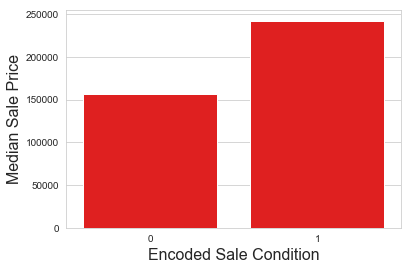

In [580]:
sale_condition = train_df.groupby('encoded_condition')['SalePrice'].agg('median').reset_index()
sns.barplot(sale_condition['encoded_condition'], sale_condition['SalePrice'], color = 'r')
plt.xlabel('Encoded Sale Condition', size=16)
plt.ylabel('Median Sale Price', size=16)
plt.show()

# Handling Missing Values

In [581]:
data = train_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [588]:
sum(data.isnull().sum() != 0)

0

# Linear Model

In [602]:
y = np.log(train_df.SalePrice)
X = data.drop(['SalePrice'], axis=1)

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [626]:
lr = linear_model.LinearRegression()

In [628]:
model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926


About 89% of the variance in our target variable is explained by our features.

### Predict

RMSE is: 
 0.0178417945196


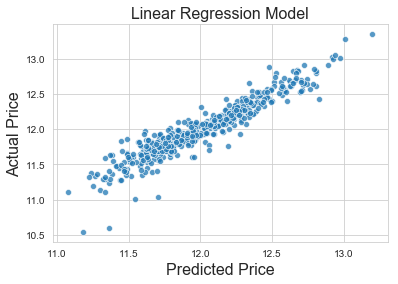

In [633]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

sns.scatterplot(predictions, y_test, alpha=.75)
plt.xlabel('Predicted Price', size=16)
plt.ylabel('Actual Price', size=16)
plt.title('Linear Regression Model', size=16)
plt.show()

# Ridge Regression

In using ridge, we try to reduce the regression coefficients of less important features.  We will test different values of alpha

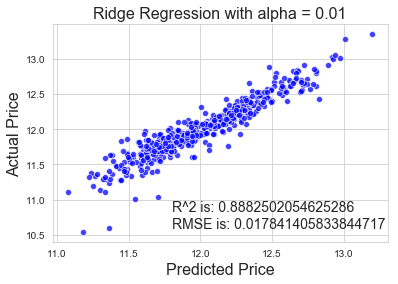

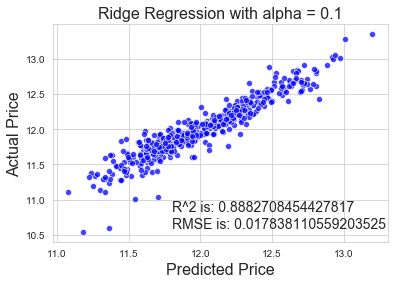

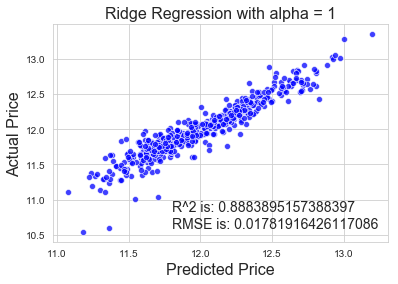

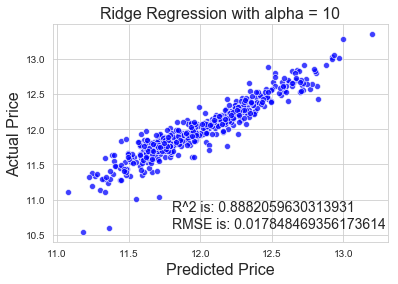

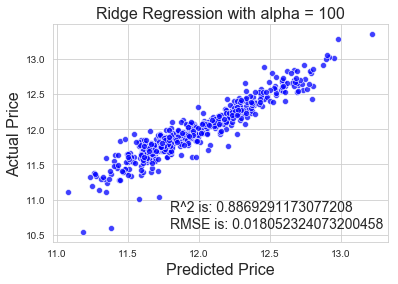

In [651]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    sns.scatterplot(preds_ridge, y_test, alpha=.75, color='b')
    plt.xlabel('Predicted Price', size=16)
    plt.ylabel('Actual Price', size=16)
    plt.title('Ridge Regression with alpha = {}'.format(alpha), size=16)
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(11.8,10.6), size=14)
    plt.show()

Come back to this model as it is pretty much the same as the linear model (add more feature engineering)

In [251]:
#mode_frontage = all_data.groupby("Neighborhood")["LotFrontage"].fillna(all_data['LotFrontage'].mode()[0])
#mean_frontage = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
median_frontage = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
frontage_zero = all_data['LotFrontage'].fillna(0)

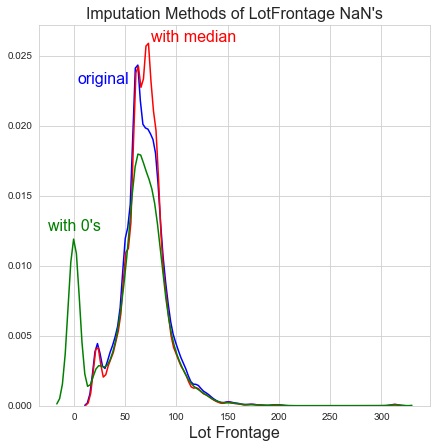

In [598]:
f, ax = plt.subplots(figsize=(7, 7))
sns.set_style("whitegrid")

ax = sns.distplot(all_data['LotFrontage'].dropna(), hist=False, color = 'b' )
ax = sns.distplot(median_frontage, hist=False, color = 'r')
ax = sns.distplot(lotfrontage_zero, hist=False, color = 'g')

red = sns.color_palette("Reds")[-2]
green = sns.color_palette("Greens")[-2]

ax.text(-25, 0.0125, "with 0's", size=16, color='g')
ax.text(3, 0.023, "original", size=16, color='b')
ax.text(75, 0.026, "with median", size=16, color='r')
plt.xlabel("Lot Frontage", size=16)
plt.title("Imputation Methods of LotFrontage NaN's", size=16)
plt.show()

Use the median house price per neighborhood to impute missing values in LotFrontage

In [253]:
all_data['LotFrontage'] = median_frontage

In [329]:
all_data.PoolQC.value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [674]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('')

In [675]:
all_data.isnull().sum().sort_values(ascending=False)

MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtUnfSF           1
BsmtFinSF1          1
TotalBsmtSF         1
Exterior2nd         1
SaleType            1
Exterior1st         1
Electrical          1
                 ... 
YearRemodAdd        0
YearBuilt           0
SaleCondition       0
HeatingQC           0
ExterCond           0
Foundation          0
YrSold              0
MoSold              0
MiscVal             0
PoolQC              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchS

In [676]:
for c in all_data.columns:
    if all_data[c].dtype == 'object':
        all_data[c] = all_data[c].fillna('Unavailable')
    else:
        all_data[c] = all_data[c].fillna(0)

In [677]:
labels1, levels1= pd.factorize(all_data.OverallQual)

x = pd.factorize(all_data.OverallQual)

In [678]:
cats = ['MSSubClass', 'OverallQual', 'OverallCond', 'YrSold']

for i in cats:
    all_data[i] = all_data[i].astype('category')

In [679]:
all_data['Fireplaces'] = np.where(all_data['Fireplaces'] == 0, 'No', 'Yes')
all_data.Fireplaces.value_counts()

Yes    1499
No     1420
Name: Fireplaces, dtype: int64

In [680]:
all_data['PoolArea'] = np.where(all_data['PoolArea'] == 0, 'No', 'Yes')

all_data.PoolArea.value_counts()

No     2906
Yes      13
Name: PoolArea, dtype: int64

In [681]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [682]:
all_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], inplace=True, axis=1)

In [683]:
all_data['TotalBath'] = all_data['BsmtFullBath'] + all_data['BsmtHalfBath'] + all_data['FullBath'] + all_data['HalfBath']

In [684]:
all_data.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True, axis=1)

In [685]:
all_data.TotalBath.value_counts()

2.0    1174
3.0     925
1.0     443
4.0     346
5.0      22
6.0       6
8.0       3
Name: TotalBath, dtype: int64

In [686]:
all_data['TotalPorchSF'] = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch']  + all_data['3SsnPorch'] + all_data['ScreenPorch']
all_data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace=True, axis=1)

In [687]:
all_data.TotalPorchSF.value_counts()

0       482
40       30
192      30
120      30
168      28
140      26
240      23
100      21
112      20
32       20
144      19
96       19
48       18
116      18
160      17
180      17
28       17
36       17
60       16
280      14
204      14
228      14
224      14
50       14
164      13
163      13
64       13
45       13
90       13
216      13
       ... 
654       1
258       1
223       1
283       1
285       1
331       1
339       1
351       1
51        1
41        1
354       1
19        1
780       1
796       1
412       1
406       1
398       1
804       1
822       1
832       1
846       1
850       1
982       1
380       1
1010      1
1030      1
1166      1
1424      1
11        1
1207      1
Name: TotalPorchSF, Length: 535, dtype: int64

In [688]:
all_data.OverallCond

0       5
1       8
2       5
3       5
4       5
5       5
6       5
7       6
8       5
9       6
10      5
11      5
12      6
13      5
14      5
15      8
16      7
17      5
18      5
19      6
20      5
21      7
22      5
23      7
24      8
25      5
26      7
27      5
28      6
29      6
       ..
2889    6
2890    5
2891    5
2892    6
2893    5
2894    5
2895    5
2896    6
2897    5
2898    5
2899    6
2900    5
2901    5
2902    5
2903    5
2904    3
2905    5
2906    6
2907    7
2908    5
2909    6
2910    4
2911    5
2912    5
2913    5
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]

In [689]:
all_data.shape

(2919, 70)

In [690]:
dummie_df = pd.get_dummies(all_data)

In [691]:
x_train = dummie_df[:len(X_train)]
x_test = dummie_df[len(X_train):]
y_train = y_train

In [692]:
X_train , X_test , Y_train , Y_test = train_test_split( x_train , y_train )

In [693]:
# model = RandomForestRegressor()
model = Ridge()
# model = LassoLarsCV()

In [701]:
model.fit( x_train , y_train )

# Print the Training Set Accuracy and the Test Set Accuracy in order to understand overfitting
print (model.score( x_train , y_train ) , model.score( X_test , Y_test ))

0.244053693495 0.276553125591


In [695]:
id = test_ID
result = model.predict(test_X)

# output = pd.DataFrame( { 'id': id , 'SalePrice': result}, columns=['id', 'SalePrice'] )
output = pd.DataFrame( { 'id': ID , 'SalePrice': result} )
output = output[['id', 'SalePrice']]

output.to_csv("solution.csv", index = False)
output.head(10)

NameError: name 'test_X' is not defined

In [ ]:
# Score on LB .44